In [67]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 



In [2]:
pip install altair_saver

     ---------------------------------------- 89.3/89.3 kB 1.3 MB/s eta 0:00:00
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
     -------------------------------------- 844.5/844.5 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [68]:
# reading the data
df = pd.read_csv("SLA_Closed_Tickets.csv")
df1=df.iloc[:,:10]

In [69]:
# The size of the data set 
df1.head()

,Case Number,Created Date,Closeddate,Category,SubCategory,Country,SLA Target,SLA Lead Time,SLA Met,Case origin
0,880507,9/29/2017 10:47,7/14/2022 7:40,Final Pay Request,Standard,Belgium,14,1748.9,0,Operations
1,2456688,9/27/2018 9:13,1/25/2022 13:02,"Pay Statement, Payroll Portal, Other Pay Inquiry",Pay Statement Inquiry,Belgium,11,1216.2,0,Operations
2,3287084,1/30/2019 8:30,2/24/2022 11:51,Tax Associated Request,Annual Tax Statement Inquiry,Belgium,13,1121.1,0,Web
3,4910149,9/26/2019 12:08,1/25/2022 10:47,Additional Permitted Payment,Supplemental Pay,Belgium,10,851.9,0,Operations
4,4913038,9/26/2019 15:32,6/15/2022 10:24,"Form, Report, Document Request",Form Request,Belgium,12,992.8,0,Web


In [70]:
# Feature information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94601 entries, 0 to 94600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Case Number    94601 non-null  int64  
 1   Created Date   94601 non-null  object 
 2   Closeddate     94601 non-null  object 
 3   Category       94601 non-null  object 
 4   SubCategory    94601 non-null  object 
 5   Country        94601 non-null  object 
 6   SLA Target     94601 non-null  int64  
 7   SLA Lead Time  94601 non-null  float64
 8   SLA Met        94601 non-null  int64  
 9   Case origin    94601 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 7.2+ MB


In [71]:
df1["SLA Met"].value_counts()

1    79781
0    14820
Name: SLA Met, dtype: int64

In [72]:
slamet = df1.loc[df1["SLA Met"]==1]

In [73]:
notslamet = df1.loc[df1["SLA Met"]==0]

In [74]:
# Frequency of notslamet group according to Category
notslamet["Category"].value_counts().sort_values()

Final Pay Request                                    173
Additional Permitted Payment                         357
Missing Or Incorrect Pay                             589
Tax Associated Request                               670
Form, Report, Document Request                      1692
Pay Statement, Payroll Portal, Other Pay Inquiry    2556
Time & Attendance                                   8783
Name: Category, dtype: int64

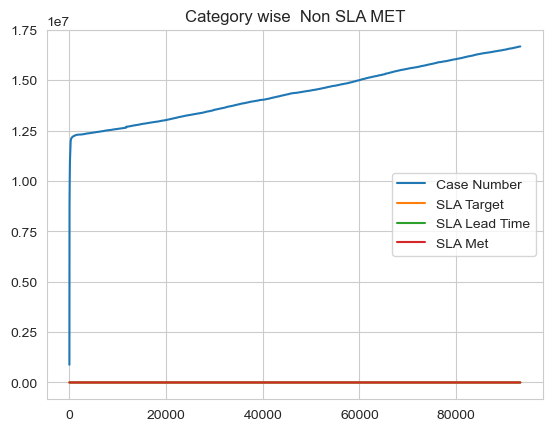

In [75]:
notslamet.plot.line(title="Category wise  Non SLA MET");

plt.show(block=True)

In [76]:
# Frequency of slamet group according to Category
slamet["Category"].value_counts().sort_values()

Final Pay Request                                    1010
Additional Permitted Payment                         1691
Missing Or Incorrect Pay                             2785
Tax Associated Request                               3591
Form, Report, Document Request                       9221
Pay Statement, Payroll Portal, Other Pay Inquiry    13260
Time & Attendance                                   48223
Name: Category, dtype: int64

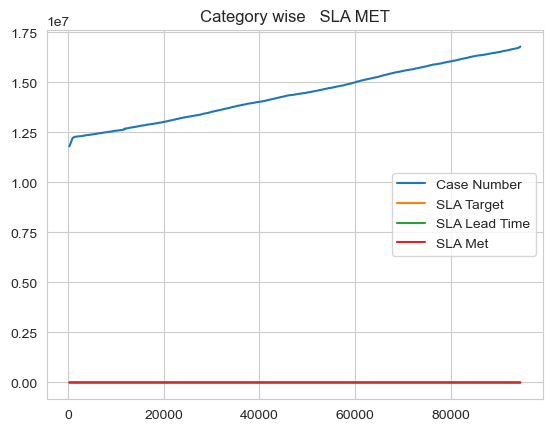

In [77]:
slamet.plot.line(title="Category wise   SLA MET");

plt.show(block=True)

In [78]:
# Frequency of non slamet group according to Country
notslamet["Country"].value_counts().sort_values()

Bulgaria                   1
Czech Republic             1
Croatia                    1
Kazakhstan                 1
Kenya                      2
Russian Federation         2
Lithuania                  2
Serbia                     3
(blank)                    3
Nigeria                    4
Slovenia                   4
Romania                    5
Norway                    10
Saudi Arabia              11
Morocco                   15
Turkey                    25
United Arab Emirates      26
Lebanon                   27
Egypt                     31
Slovakia                  32
Algeria                   43
Denmark                   48
Hungary                   49
Poland                    51
Finland                   54
Israel                    62
Portugal                  93
Greece                   181
South Africa             188
Sweden                   253
United Kingdom           318
Ireland                  443
Spain                    460
Austria                  487
France        

<AxesSubplot:xlabel='Case origin', ylabel='SLA Met'>

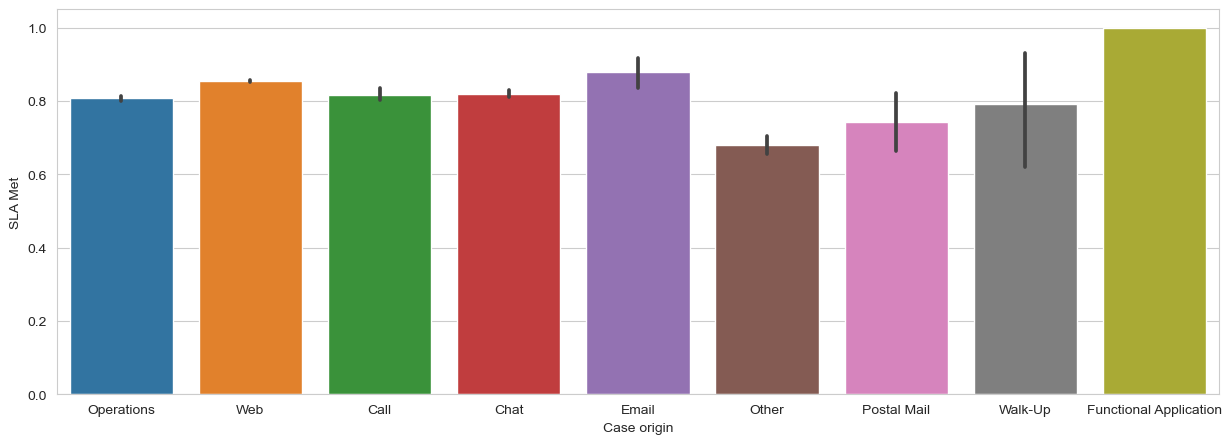

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="Case origin", y="SLA Met", data=df1)

<AxesSubplot:xlabel='Country', ylabel='SLA Met'>

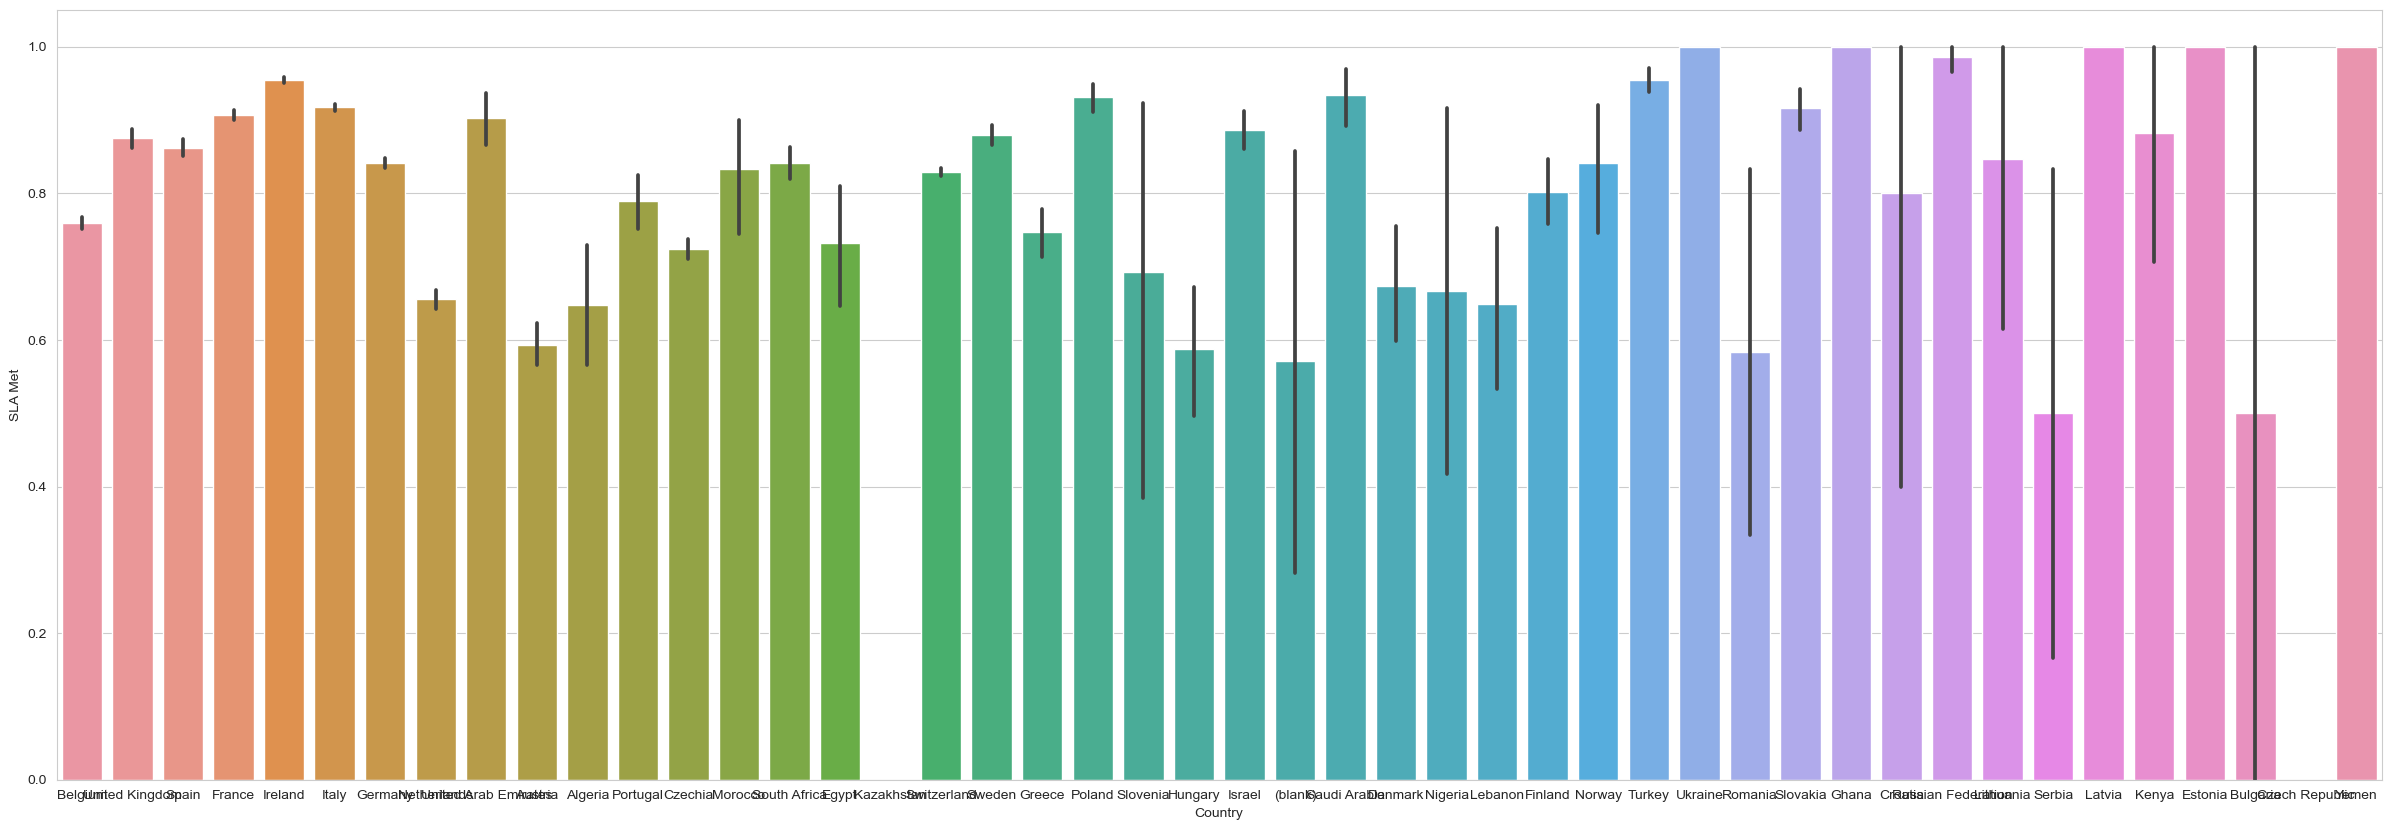

In [80]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x="Country", y="SLA Met", data=df1,ax=ax)

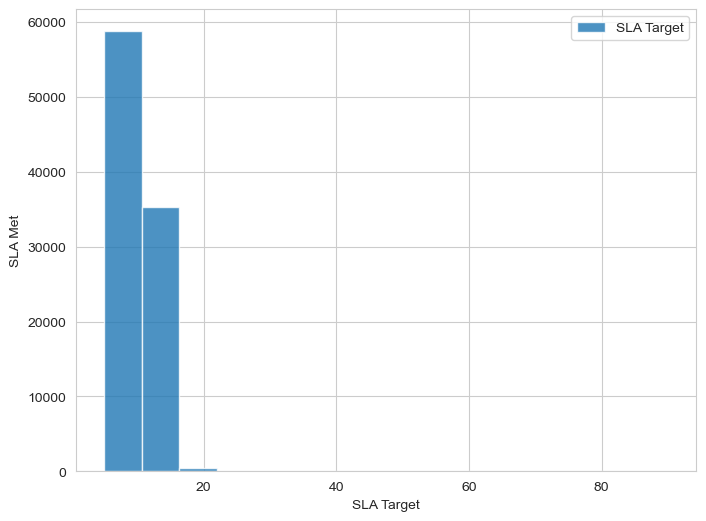

In [81]:
# distribution of the rev_growth_yoy for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('SLA Target')
pyplot.ylabel('SLA Met')
pyplot.hist(df1["SLA Target"],bins=15, alpha=0.8, label='SLA Target')
pyplot.legend(loc='upper right')
pyplot.show()

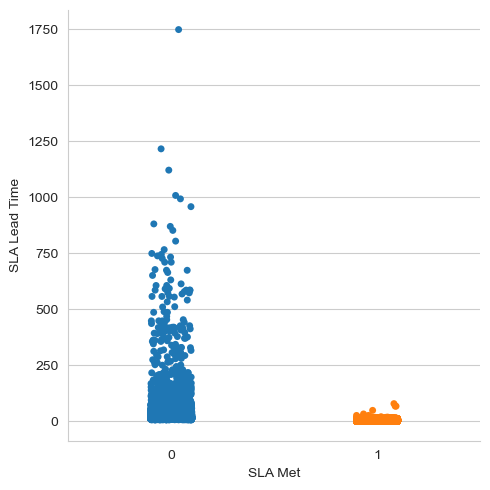

In [82]:
sns.catplot("SLA Met", "SLA Lead Time", data = df1)

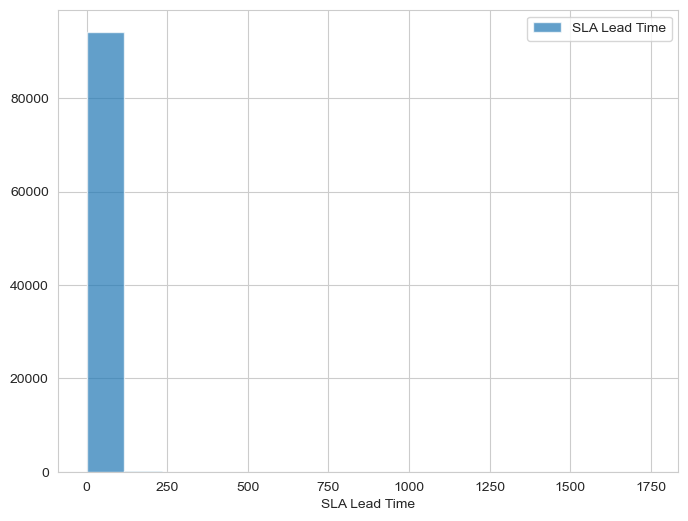

In [83]:
# distribution of the Service_Score for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('SLA Lead Time')
pyplot.hist(df1["SLA Lead Time"],bins=15, alpha=0.7, label='SLA Lead Time')
pyplot.legend(loc='upper right')
pyplot.show()

<AxesSubplot:title={'center':'SLA Met'}, xlabel='Case origin'>

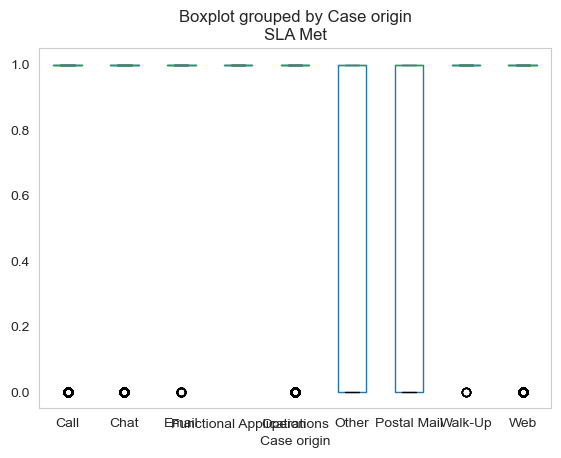

In [84]:
df1.boxplot(by ='Case origin', column =['SLA Met'], grid = False)

<AxesSubplot:xlabel='Country', ylabel='SLA Met'>

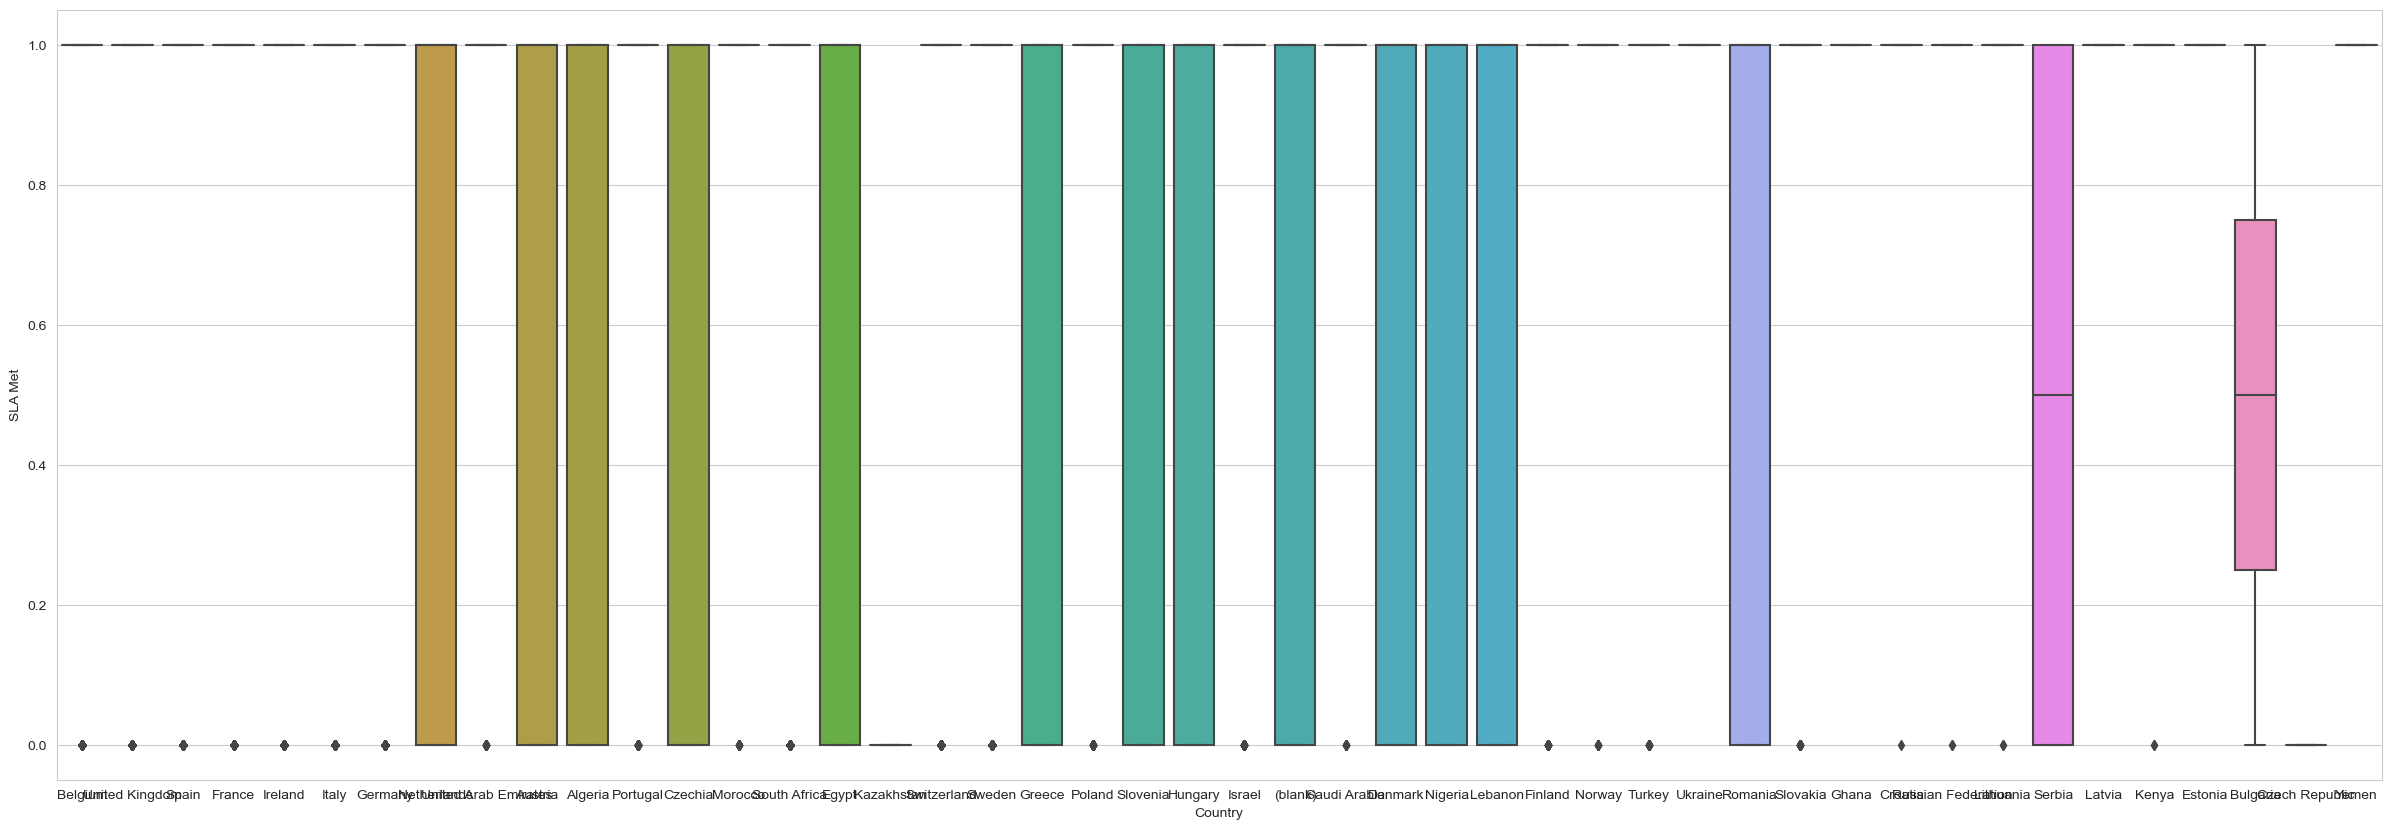

In [85]:
# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x = 'Country', y = 'SLA Met', data = df1,ax=ax)


<AxesSubplot:xlabel='Case origin', ylabel='SLA Met'>

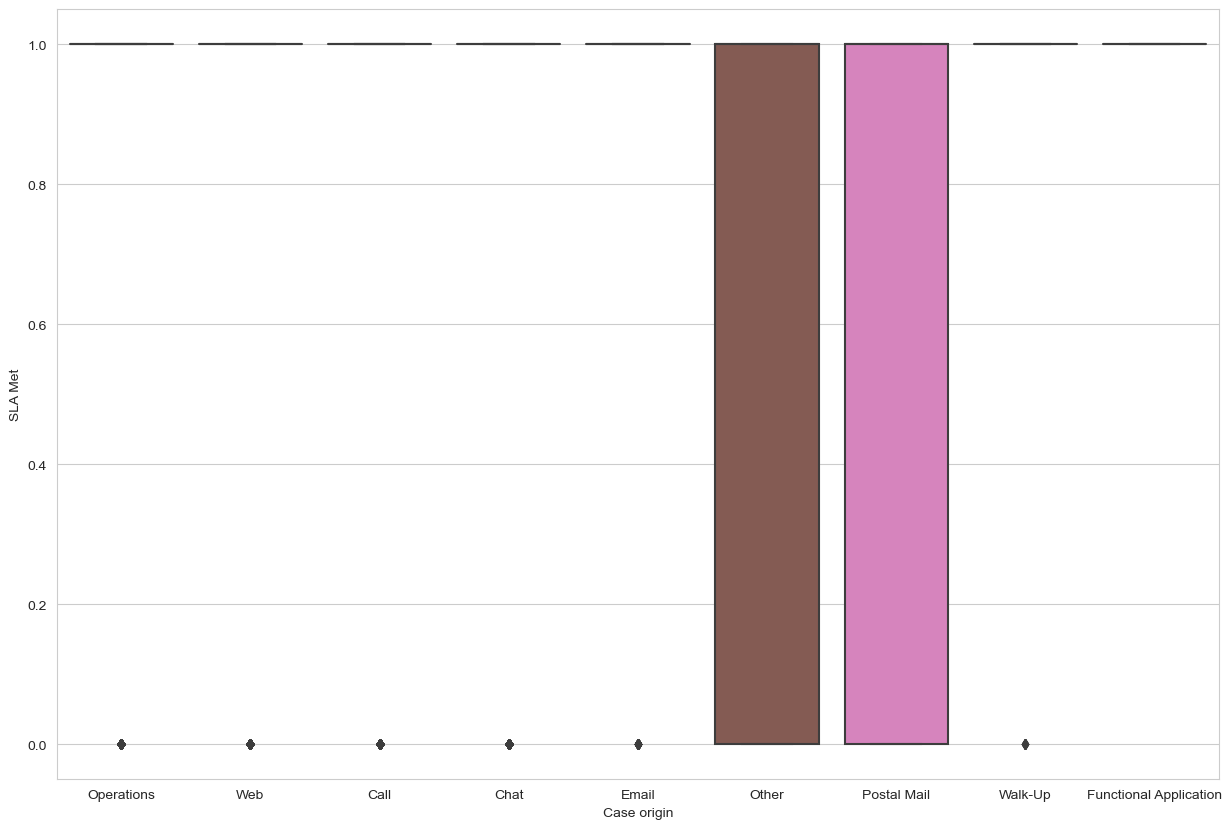

In [86]:

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x = 'Case origin', y = 'SLA Met', data = df1,ax=ax)

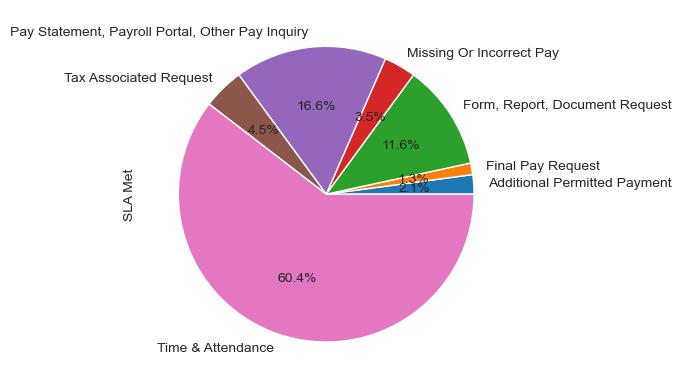

In [87]:
data = df1.groupby("Category")["SLA Met"].sum()
data.plot.pie(autopct="%.1f%%");

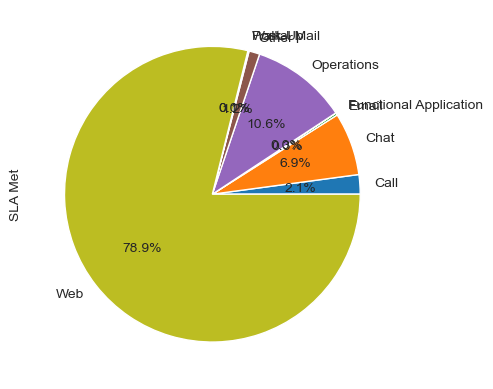

In [88]:
data1 = df1.groupby("Case origin")["SLA Met"].sum()
data1.plot.pie(autopct="%.1f%%");

<AxesSubplot:>

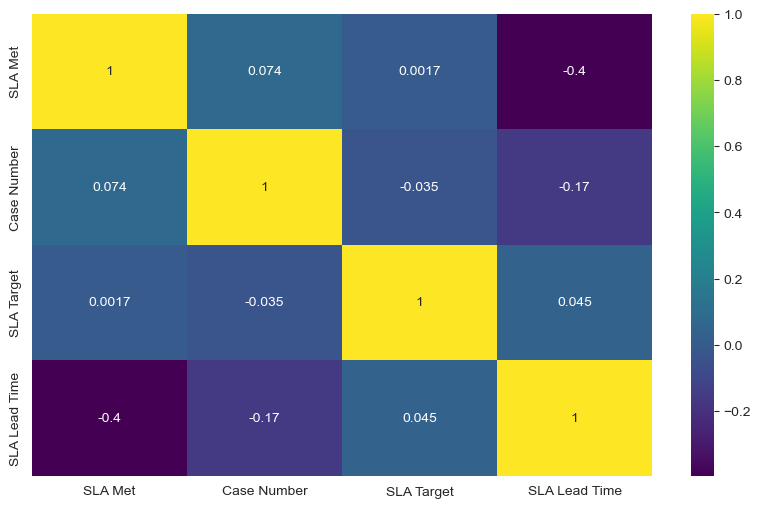

In [89]:
# Exited correlation matrix
k = 10 #number of variables for heatmap
cols = df1.corr().nlargest(k, 'SLA Met')['SLA Met'].index
cm = df1[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# Data Preproccessing

In [90]:

df1.isna().sum()

Case Number      0
Created Date     0
Closeddate       0
Category         0
SubCategory      0
Country          0
SLA Target       0
SLA Lead Time    0
SLA Met          0
Case origin      0
dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder
le = LabelEncoder()
# apply "le.fit_transform"
df1[['Category','SubCategory','Country','Case origin']]=df1[['Category','SubCategory','Country','Case origin']].apply(le.fit_transform)


In [92]:
df1.head()

,Case Number,Created Date,Closeddate,Category,SubCategory,Country,SLA Target,SLA Lead Time,SLA Met,Case origin
0,880507,9/29/2017 10:47,7/14/2022 7:40,1,20,3,14,1748.9,0,4
1,2456688,9/27/2018 9:13,1/25/2022 13:02,4,15,3,11,1216.2,0,4
2,3287084,1/30/2019 8:30,2/24/2022 11:51,5,1,3,13,1121.1,0,8
3,4910149,9/26/2019 12:08,1/25/2022 10:47,0,22,3,10,851.9,0,4
4,4913038,9/26/2019 15:32,6/15/2022 10:24,2,6,3,12,992.8,0,8


# Split the data into train and Test

In [93]:
#Split the data again, but this time into 75% training and 25% testing data sets.
X = df1.drop(["Created Date","Closeddate","SLA Met"],axis=1)
Y = df1["SLA Met"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [94]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 0.04364055, -1.75819786, -1.5475022 , ...,  0.55728086,
        -0.26589079,  0.50154747],
       [ 1.62620915,  0.6944503 , -0.80422259, ..., -0.73081877,
        -0.29244019,  0.50154747],
       [ 0.3265216 , -0.53187378, -1.42362226, ..., -0.30145223,
        -0.09331972,  0.50154747],
       ...,
       [ 1.5969442 , -0.53187378, -1.42362226, ..., -0.30145223,
        -0.2526161 ,  0.50154747],
       [ 1.14258691, -1.75819786, -1.5475022 , ...,  0.55728086,
        -0.03137113,  0.50154747],
       [-1.21225194,  0.6944503 ,  0.06293694, ...,  0.98664741,
        -0.2039422 ,  0.50154747]])

# Model

In [97]:
from sklearn.linear_model import LinearRegression
def models(X_train,Y_train):
  
  #Using RandomForestClassifier()
  rf=RandomForestClassifier()
  rf.fit(X_train,Y_train)
  
  #Using Linear Regression 
  lr=LinearRegression()
  lr.fit(X_train, Y_train)
   #Using KNeighborsClassifier 
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
    
  #using XGBClassifier()
  xg=XGBClassifier()
  xg.fit(X_train, Y_train)
 
  #print model accuracy on the training data.
  print('[1]Linear Regression Training Accuracy:', lr.score(X_train, Y_train))
  print('[2]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[4]Random Forest Classifier Training Accuracy:', rf.score(X_train, Y_train))
  print('[5]xgBoost Classifier Training Accuracy:', xg.score(X_train, Y_train))
  
  
  return  rf,lr,knn,tree,xg

# #Accuracy

In [98]:
model = models(X_train,Y_train)

[1]Linear Regression Training Accuracy: 0.15946041039195868
[2]K Nearest Neighbor Training Accuracy: 0.9872022551092319
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 1.0
[5]xgBoost Classifier Training Accuracy: 0.9999718111346019


In [99]:
#Print Prediction of DT model
print("Predicted Values")
pred_k = model[2].predict(X_test)
print(pred_k)

#Print a space
print("Actual Values")

#Print the actual values
print(Y_test)

Predicted Values
[1 1 1 ... 1 1 1]
Actual Values
49346    1
92194    1
57555    1
92751    1
78624    1
        ..
21742    1
73659    1
91351    1
78214    1
13532    1
Name: SLA Met, Length: 23651, dtype: int64
